# Исследование критериев успешности игр для интернет-магазина

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Просмотр-данных-и-поиск-дубликатов" data-toc-modified-id="Просмотр-данных-и-поиск-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Просмотр данных и поиск дубликатов</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Составление-портрета-пользователя-каждого-региона" data-toc-modified-id="Составление-портрета-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя каждого региона</a></span></li></ul></div>

## Обзор данных


In [156]:
#Импорт необходимых библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy import stats as st


In [157]:
data = pd.read_csv('D:\Jypiter\datasets\games.csv')
data.columns = data.columns.str.lower() #приведение заголовков к нижнему регистру
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных
### Просмотр данных и поиск дубликатов

Рассмотрим информацию в столбцах, чтобы получить представление о содержании датафрейма.

In [159]:
print(data['name'].value_counts().head()) #подсчёт повторений по уникальным значениям
data.query('name == "Ratatouille" ')

Need for Speed: Most Wanted    12
Madden NFL 07                   9
LEGO Marvel Super Heroes        9
FIFA 14                         9
Ratatouille                     9
Name: name, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65.0,8,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56.0,tbd,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,tbd,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


Столбец 'name' имеет по большей части уникальные значения. Повторения возникают в случаях, когда игра вышла на нескольких платформах.

Проверим наличие явных дубликатов:
* по полным строкам
* по строкам с одинаковым именем и платформой

In [160]:
data.duplicated().sum()

0

In [161]:
data[data[['name', 'platform']].duplicated()].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN


**Явных дубликатов не найдено**

Продолжим обзор значений в следующих колонках

In [162]:
print(data['platform'].unique()) #просмотр уникальных значений
print()
data['platform'].value_counts().head(10) #подсчёт повторений по уникальным значениям

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']



PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: platform, dtype: int64

Видим информацию о 31-ой платформе для игр.

In [163]:
print(data['genre'].unique())
data['genre'].value_counts()

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Минимум: 0.0 Максимум: 41.36


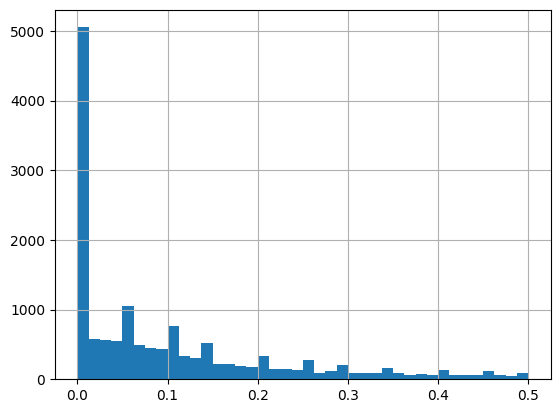

In [164]:
data['na_sales'].hist(bins=40, range=(0, 0.5)) #построение гистограммы распределения
print('Минимум:', data['na_sales'].min(), 'Максимум:', data['na_sales'].max()) #нахождение минимума и максимума распределения


Минимум: 0.0 Максимум: 28.96


count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

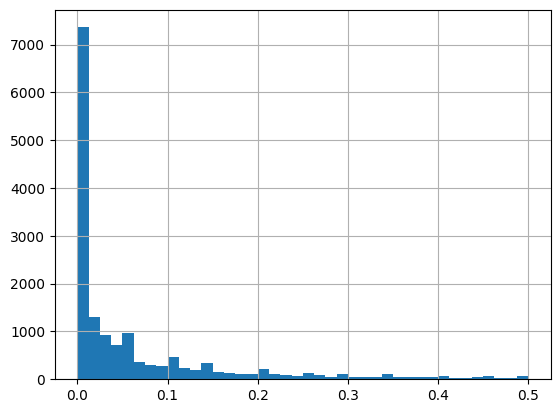

In [165]:
data['eu_sales'].hist(bins=40, range=(0, 0.5))
print('Минимум:', data['eu_sales'].min(), 'Максимум:', data['eu_sales'].max())
data['eu_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

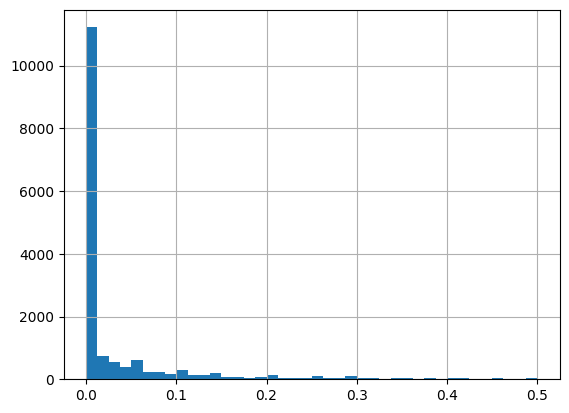

In [166]:
data['jp_sales'].hist(bins=40, range=(0, 0.5))
data['jp_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

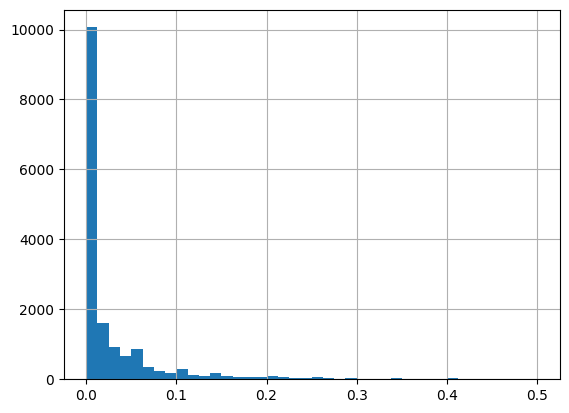

In [167]:
data['other_sales'].hist(bins=40, range=(0, 0.5))
data['other_sales'].describe()

In [168]:
print(data['critic_score'].sort_values().unique())
print(data['user_score'].value_counts())

[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.3       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


In [169]:
print(data['user_score'].sort_values().unique())
data.query('user_score =="tbd" ').head(10) #срез со значениями 'tbd'


['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Видим, что помимо 'Nan' в столбце есть значения 'tbd', которое можно расшифровать, как "значение еще не определено".
В срезе видим, что 'tbd' встречается в строках с разными годами выпуска, платформами и т.д. Иными словами параметр не зависит от чего-то определенного, будем рассматривать его также как пропущенные значения.

In [170]:
data['user_score'] = data['user_score'].replace('tbd', np.nan) # замена 'tbd' на 'nan'

In [171]:
print(data['rating'].sort_values().unique())
print(data['rating'].value_counts())
data[data['rating'].isna()].head(5)

['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


**Заметим необходимость изменения типа данных в столбцах:**
* 'Year_of_Release'  c 'float' на 'int'
* 'User_Score' c 'object' на 'float'

Сделаем это после выполнения работы по заполнению пропусков.

### Заполнение пропусков

Для первичной визуализации пропусков применим heatmap. Виддно, что наибольшее кол-во пропусков сосредоточено в столбцах с оценками и рейтингом, а наибольшая концентрация строк с пропусками в строках до 2000 года.

<AxesSubplot:>

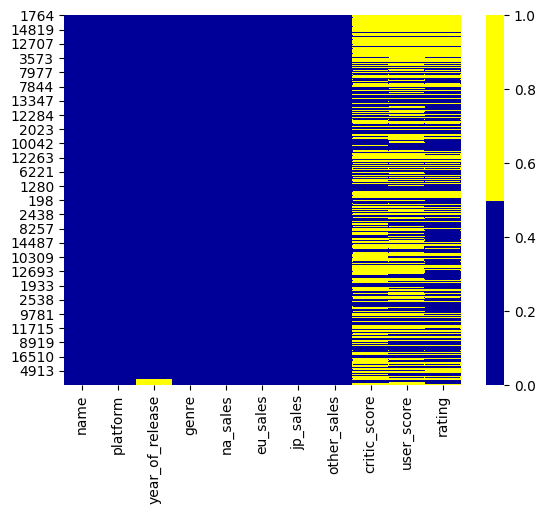

In [172]:
colours = ['#000099', '#ffff00'] 

data_sorted = data.sort_values(by='year_of_release')
sns.heatmap(data_sorted[data_sorted.columns].isnull(), cmap=sns.color_palette(colours))

In [173]:
data.isna().sum().sort_values(ascending=False) #подсчёт количества пропусков в столбцах
data[data['genre'].isna()].head(20)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Колонки 'name' и 'genre' важны для дальнейшего анализа, пропуски из них нужно убрать.
Поскольку возможности восстановить данные нет, можем удалить эти строки. Их всего 2, что статически не повлияет на дальнейший анализ.

Предполагаемая причина пропусков в столбцах 'name' и 'genre': данные были утеряны при переносе между базами данных. Вряд ли изначально при заполненнии данных ввели выручки по регионам, но не написали название игры и жанр

In [174]:
data = data.dropna(subset=['name', 'genre'])

Посмотрим в каких строках пропущены годы релиза:


In [175]:
data[data['year_of_release'].isna()].head(50).sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3289,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
2106,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.00,0.01,NaN,NaN,NaN
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
3704,Def Jam: Fight for NY,XB,NaN,Fighting,0.43,0.10,0.00,0.02,84.0,8.5,M
2010,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E


Видно, что пропуски в годах встречаются хаотично, на разных платформах в разных названиях игр. А другие столбцы бывают как с пропусками, так и без
    
Предположение, что данные в столбце не были введены при формировании таблицы, либо были утеряны при переносе

Можно попробовать заменить пропуски в столбце 'year_of_release' значениями из той же игры, если у нее есть год выпуска на другой платформе.

Построим таблицу, куда попадут игры, имеющие год релиза хотя бы на одной платформе, и не имеющие его хотя бы на одной.

In [176]:
is_year = data['name'][~data['year_of_release'].isna()]
isnt_year = data['name'][data['year_of_release'].isna()]


data_year = data.query('name in @is_year & name in @isnt_year').sort_values(by='name')
data_year.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4800,AKB1/48: Idol to Guam de Koishitara...,PSP,2011.0,Misc,0.00,0.00,0.40,0.00,NaN,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16157,Aquaman: Battle for Atlantis,XB,NaN,Action,0.01,0.00,0.00,0.00,26.0,2.7,T
16353,Aquaman: Battle for Atlantis,GC,2003.0,Action,0.01,0.00,0.00,0.00,27.0,3.1,T
13609,Battle vs. Chess,PS3,NaN,Misc,0.00,0.03,0.00,0.01,NaN,NaN,T
14746,Battle vs. Chess,PC,NaN,Misc,0.00,0.02,0.00,0.00,69.0,5.9,T
14765,Battle vs. Chess,X360,2011.0,Misc,0.00,0.02,0.00,0.00,NaN,NaN,T
9043,Bejeweled 3,PS3,NaN,Puzzle,0.13,0.00,0.00,0.02,76.0,8.2,E
9218,Bejeweled 3,X360,NaN,Puzzle,0.13,0.00,0.00,0.01,78.0,8.4,E
11352,Bejeweled 3,PC,2010.0,Puzzle,0.02,0.05,0.00,0.01,82.0,8.1,E


In [177]:
data_year['name'].value_counts()

Madden NFL 07                                  9
LEGO Harry Potter: Years 5-7                   8
LEGO Batman: The Videogame                     7
Madden NFL 06                                  7
LEGO Indiana Jones: The Original Adventures    7
                                              ..
Splatterhouse                                  2
Majesty 2: The Fantasy Kingdom Sim             2
Star Wars Jedi Knight II: Jedi Outcast         2
Record of Agarest War Zero                     2
Star Trek: Conquest                            2
Name: name, Length: 99, dtype: int64

Длина 99 показывает, что даже если мы попробуем заполнить по такому принципу строки, то это удастся лишь в меньшей части случаев (всего игр с пропущеннными датами 232).

Вдобавок у нас нет уверенности, что игра выходила на всех площадках в один год. Есть примеры, опровергающие это.

Вывод: лучше удалить строки с пропусками в столбце 'year_of_release' для дальнейшей работы (~0.3% от всех строк)<br>
Предполагаемая причина пропусков в столбцах 'year_of_release': данные были утеряны при переносе между базами данных. Вряд ли изначально при заполненнии данных ввели выручки по регионам, но не написали название игры и жанр

In [178]:
data = data.dropna(subset=['year_of_release'])

Проанализируем оставшиеся три столбца с пропусками:

 Видно, что пропуски в годах встречаются хаотично, и зачастую сразу в трех столбцах: "critic_score", "user_score",  "rating".
    
Предположение, что данные в столбце не были указаны изначально, либо были утеряны при переносе

In [179]:
data[data['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [180]:
data[(~data['critic_score'].isna()) &  (~data['user_score'].isna()) & (~data['rating'].isna())].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6826 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6826 non-null   object 
 1   platform         6826 non-null   object 
 2   year_of_release  6826 non-null   float64
 3   genre            6826 non-null   object 
 4   na_sales         6826 non-null   float64
 5   eu_sales         6826 non-null   float64
 6   jp_sales         6826 non-null   float64
 7   other_sales      6826 non-null   float64
 8   critic_score     6826 non-null   float64
 9   user_score       6826 non-null   object 
 10  rating           6826 non-null   object 
dtypes: float64(6), object(5)
memory usage: 639.9+ KB


В оставшихся трёх столбцах с пропусками, наблюдаем большое количество пустых значения (6 тыс.+ в каждом). Всего строк, где не останется пропусков 6826, что составляет ~40% от начального количества.

Убирать строки с пропущенными значениями в данных столбцах не верно, ввиду потери большого количества информации.

При этом заполнять медианными или средними значениями также не верно, т.к. рейтинг в реальности может быть любым, а замена на медианные значения исказит статистику.

Таким образом, в столбцах 'critic_score', 'user_score',  'rating'  оставляем пропуски, как есть.

### Изменение типов данных

Есть 2 столбца, где было бы уместно заменить типы данных:

* year_of_release. C 'float' на 'int'

* user_score. С 'object' на 'float'



In [181]:
data['year_of_release'] = data['year_of_release'].astype('int', errors='ignore') # замена типа данных
data['user_score'] = data['user_score'].astype('float', errors='ignore') # замена типа данных

Создадим для дальнейшего анализа столбец 'total_sales' с суммарными значениями продаж по всем четырём приведенным регионам.

In [182]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Проанализировали строки с пустыми значениями в столбце 'rating'. Если у игры нет этого рейтинга, то его нет на всех платформах, т.е. пропуски - не результаты случайных ошибок по заполнению, а просто некоторые игры не имеют этого рейтинга. Возможно, они имеют рейтинг по другой классификации, например PEBI, о которой нет данных в это таблице.

Поставим заглушку "999" вместо Nan в столбце "rating"

In [183]:
data['rating'] = data['rating'].fillna('999')

In [184]:
# Проврим результат работы по предобработке данных
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
    print('-'* 25)
    print(col_l, temp[col_l].sort_values().unique())
    print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

Вывод по предобработке данных: пропуски были устранены без потери объёма данных, типы изменены для дальнейшей работы. Проверено отсутствие дубликатов.

## Исследовательский анализ данных

Рассмотрим сколько игр выпускалось в какие годы. Для этого создадим сводную таблицу по названию игр и годам.
По гистограмме видно, что пик выпуска игр был с 2001 по 2012 года.

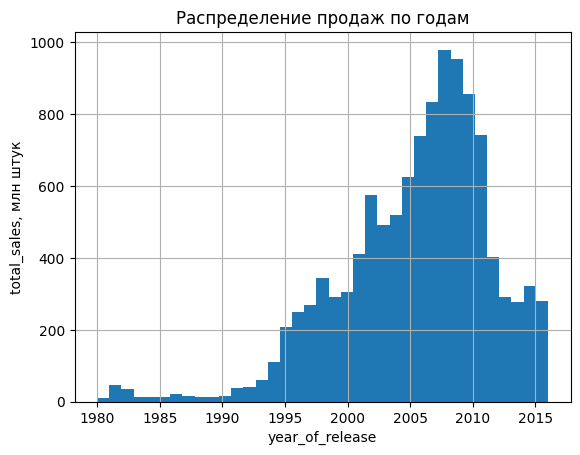

In [185]:
df_name_years = data.pivot_table(index='name', values='year_of_release', aggfunc='min') #получение сводной таблицы
hist_year = df_name_years['year_of_release'].plot(kind='hist', grid=True, bins=37, label = 'x') #построение гистограммы распределения релиза игр по годам
plt.title('Распределение продаж по годам')
hist_year.set_xlabel('year_of_release')
hist_year.set_ylabel('total_sales, млн штук')
plt.show()


Выведем топ платформ с наибольшим количеством продаж:

In [186]:
df_platform_sales = ( data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                      .sort_values(by='total_sales', ascending=False) )
df_platform_sales.head()


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Рассмотрим ТОП-5 платформ:

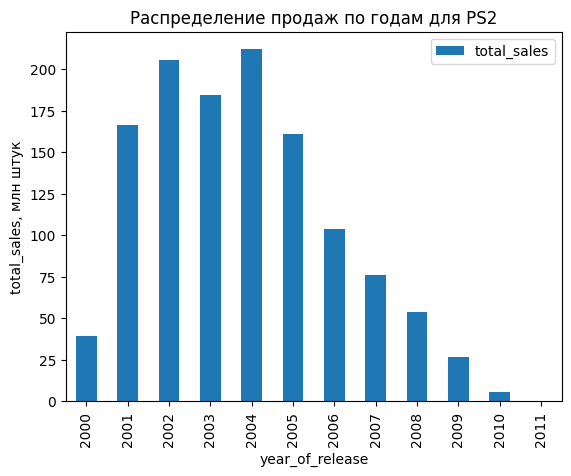

In [187]:
df_PS2 = ( data.query('platform == "PS2" ')
         .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
         .plot(kind='bar') )
plt.title('Распределение продаж по годам для PS2')
df_PS2.set_xlabel('year_of_release')
df_PS2.set_ylabel('total_sales, млн штук')
plt.show()

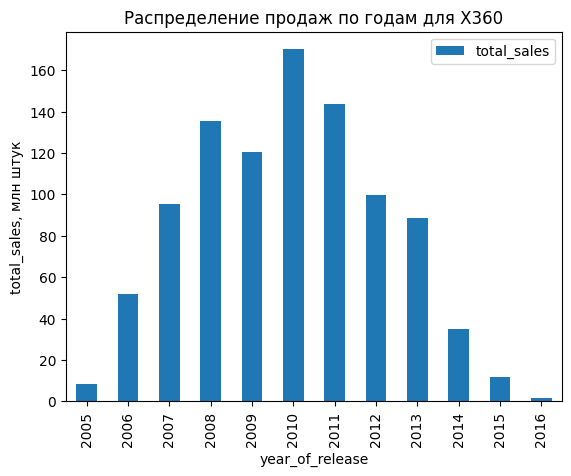

In [188]:
df_X360 = ( data.query('platform == "X360" ')
          .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
          .plot(kind='bar') )
plt.title('Распределение продаж по годам для X360')
df_X360.set_xlabel('year_of_release')
df_X360.set_ylabel('total_sales, млн штук')
plt.show()

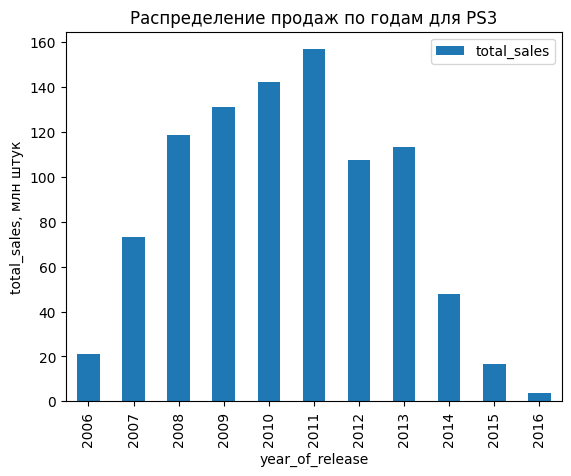

In [189]:
df_PS3 = ( data.query('platform == "PS3" ')
          .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
          .plot(kind='bar') )
plt.title('Распределение продаж по годам для PS3')
df_PS3.set_xlabel('year_of_release')
df_PS3.set_ylabel('total_sales, млн штук')
plt.show()

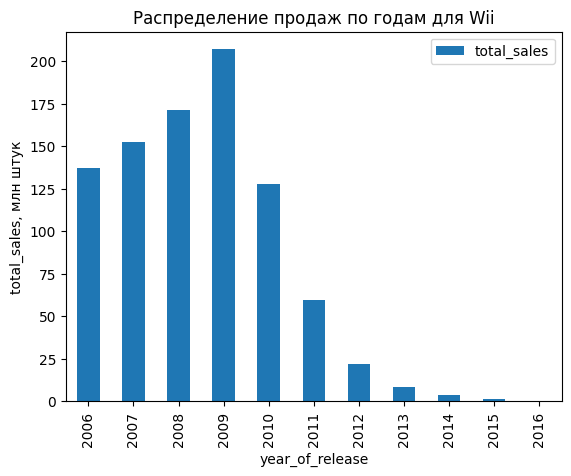

In [190]:
df_Wii = ( data.query('platform == "Wii" ')
          .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
          .plot(kind='bar') )
plt.title('Распределение продаж по годам для Wii')
df_Wii.set_xlabel('year_of_release')
df_Wii.set_ylabel('total_sales, млн штук')
plt.show()

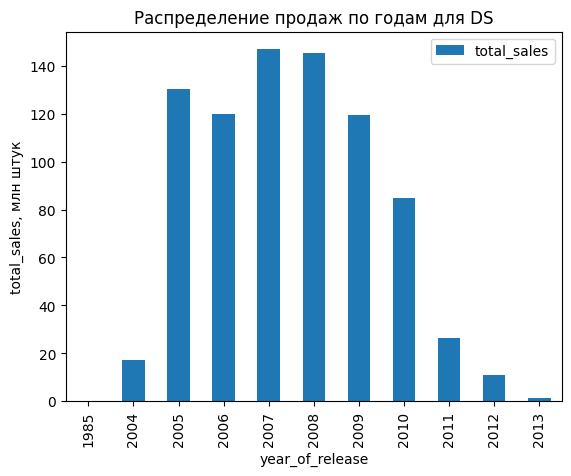

In [191]:
df_DS = ( data.query('platform == "DS" ')
          .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
          .plot(kind='bar') )
plt.title('Распределение продаж по годам для DS')
df_DS.set_xlabel('year_of_release')
df_DS.set_ylabel('total_sales, млн штук')
plt.show()

In [192]:
data.query('platform == "DS" and year_of_release == 1985').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,999,0.02


Nintendo DS появилась в 2004 году, а игра была выпущена в 1985. В интернете есть информация, что игра выпускалась для другой платформы, а в 2005 году перевыпущена для "DS". Исправим это:

In [193]:
data.loc[15957, 'year_of_release'] = 2005
data.query('name == "Strongest Tokyo University Shogi DS" and platform == "DS"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,2005,Action,0.0,0.0,0.02,0.0,NaN,NaN,999,0.02


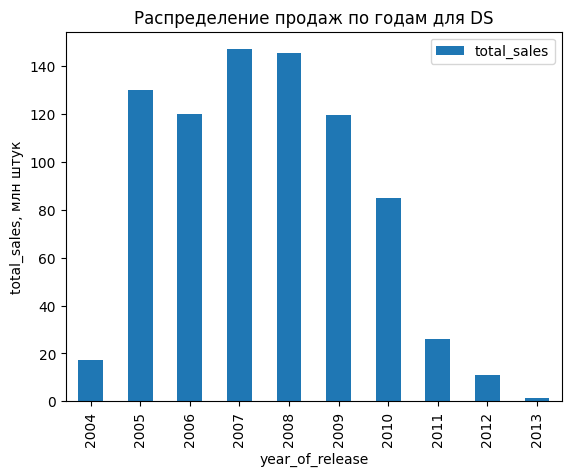

In [194]:
df_DS = ( data.query('platform == "DS" ')
          .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
          .plot(kind='bar') )
plt.title('Распределение продаж по годам для DS')
df_DS.set_xlabel('year_of_release')
df_DS.set_ylabel('total_sales, млн штук')
plt.show()

По анализу гистограм пяти популярных платформ можно определить характерный срок жизни платформ: 10 лет.

Однако для наибольшей приближенности к следющему году выберем 5-летний срок (2012-2016).

Построим графики динамики продаж по годам в разбивке по платформам:

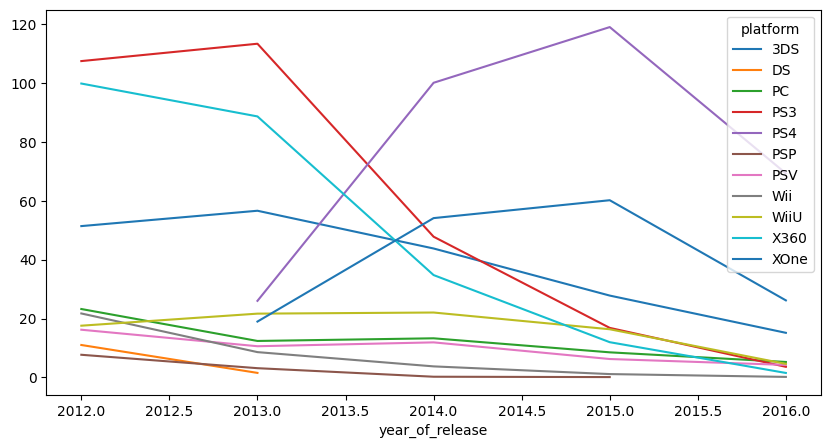

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [195]:
data_actual = data.query('year_of_release >= 2012') #фильр исходного датафрейма с годами релиза за последние 5 лет. Далее везде будет использоваться новый датафрейм
sales_platforms = ( data_actual
          .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') )

sales_platforms.plot(figsize=(10,5)) 
plt.show()
sales_platforms

Видно, что динамика продаж в данных регионах низкоходящая, при том лишь 3 платформы за последние 5 лет показали доход более 15 млн в год:
* XOne
* PS4
* 3DS

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

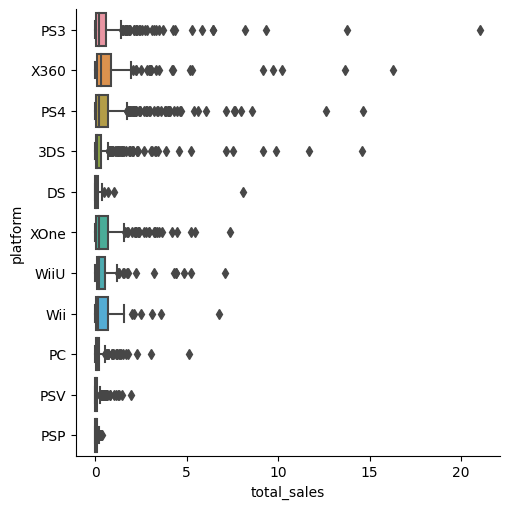

In [196]:
sns.catplot(data=data_actual, kind='box', x='total_sales', y='platform', orient='h', height=5)

(0.0, 1.0)

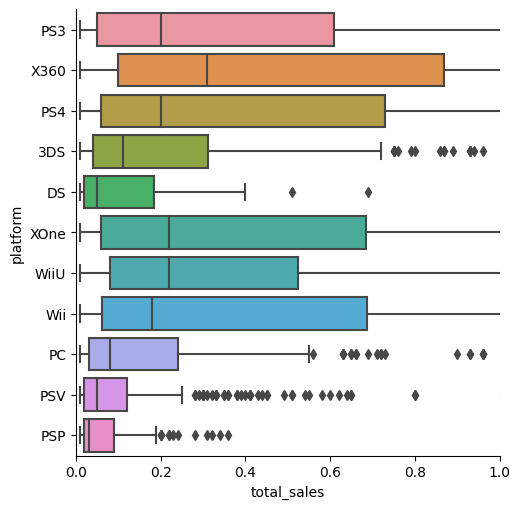

In [197]:
sns.catplot(data=data_actual, kind='box', x='total_sales', y='platform', orient='h', height=5)
plt.xlim(0, 1)

Видно что бОльшая часть игр на платформах приносит небольшой доход (медиана смещена в левый край распределения).
Есть также выбросы в правой части, которые показывают наличие отдельных игр, приносящих огромные продажи по сравнению с  общей массой.

Более ровная картина только в нижней части графика, но это малопопулярные платформы без выстреливающих игр

Взглянем на примеры выбросов (отдельных игр, имеющих колоссальные продажи) на примере трёх наиболее популярных платформ:

In [198]:
data_actual.query('platform == "XOne" ').sort_values(by='total_sales', ascending=False).head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,999,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


In [199]:
data_actual.query('platform == "PS4" ').sort_values(by='total_sales', ascending=False).head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,999,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,999,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [200]:
data_actual.query('platform == "3DS" ').sort_values(by='total_sales', ascending=False).head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,999,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,999,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,999,7.55


Можно сказать, что это общая картина для многих платформ. Одни и те же игры генерируют основную выручку.

На PS4, XOne, PS4 и X360 это:
* Call of Duty: Black Ops III;
* Grand Theft Auto V;
* FIFA 16.

На 3DS, DS, Wii это:
* Pokemon X/Pokemon Y;
* Mario Kart 7 ;
* Pokemon Omega Ruby/Pokemon Alpha Sapphire.

А для персонального компьютера - это:
* The Sims 3;
* Diablo III;
* StarCraft II: Wings of Liberty.

In [201]:
top_platforms = data_actual.groupby('platform').sum().index #Топ-платформы

print(top_platforms)
print()

for plat in top_platforms: # Цикл для построения наиболее продаваемых игр на каждой платформе
    print(data_actual[['name', 'platform', 'total_sales']]
          [data_actual['platform'] == plat]
          .sort_values(by='total_sales', ascending=False).head(5))
    print()

Index(['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360',
       'XOne'],
      dtype='object', name='platform')

                                         name platform  total_sales
33                        Pokemon X/Pokemon Y      3DS        14.60
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS        11.68
62                    New Super Mario Bros. 2      3DS         9.90
73                  Animal Crossing: New Leaf      3DS         9.17
96        Super Smash Bros. for Wii U and 3DS      3DS         7.55

                                      name platform  total_sales
83         Pokemon Black 2/Pokemon White 2       DS         8.06
2039                      Pokemon Conquest       DS         1.02
2963        LEGO Batman 2: DC Super Heroes       DS         0.69
3862                  Frozen: Olaf's Quest       DS         0.51
4845  Moshi Monsters: Moshlings Theme Park       DS         0.40

                                      name platform  total_sales
19

Оценим как влияют на продажи отзывы пользователей и критиков.

Построим точечные графики и посчитаем корреляцию между отзывами пользователей, критиков и продажами

Платформа XOne

Коэффициент корреляции "user_score" и "total_sales": -6.89 %
Коэффициент корреляции "critic_score" и "total_sales": 41.7 %


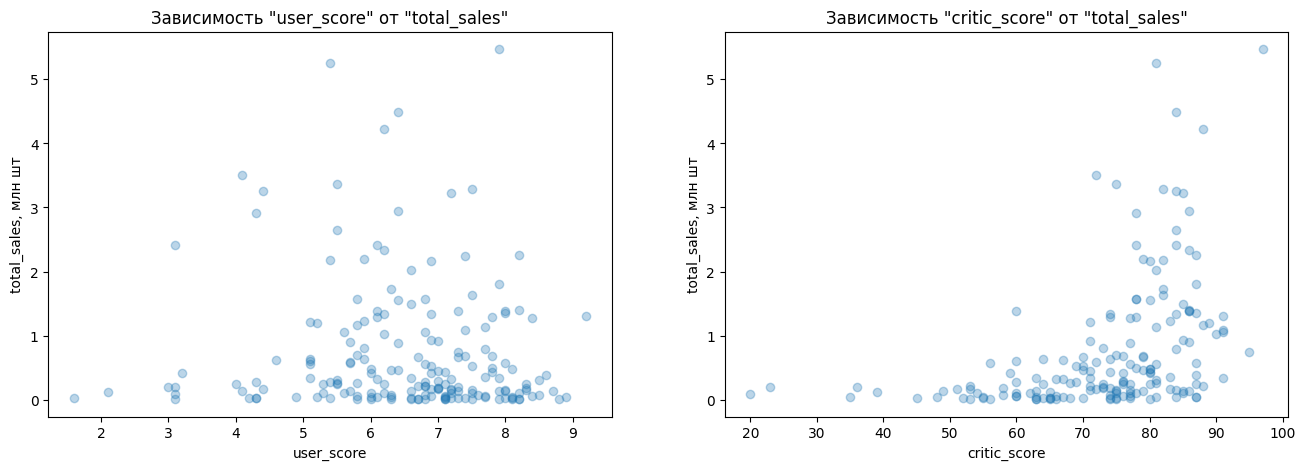

----------------------------------------------------------------------------------------------------------------------
Платформа PS4

Коэффициент корреляции "user_score" и "total_sales": -3.2 %
Коэффициент корреляции "critic_score" и "total_sales": 40.66 %


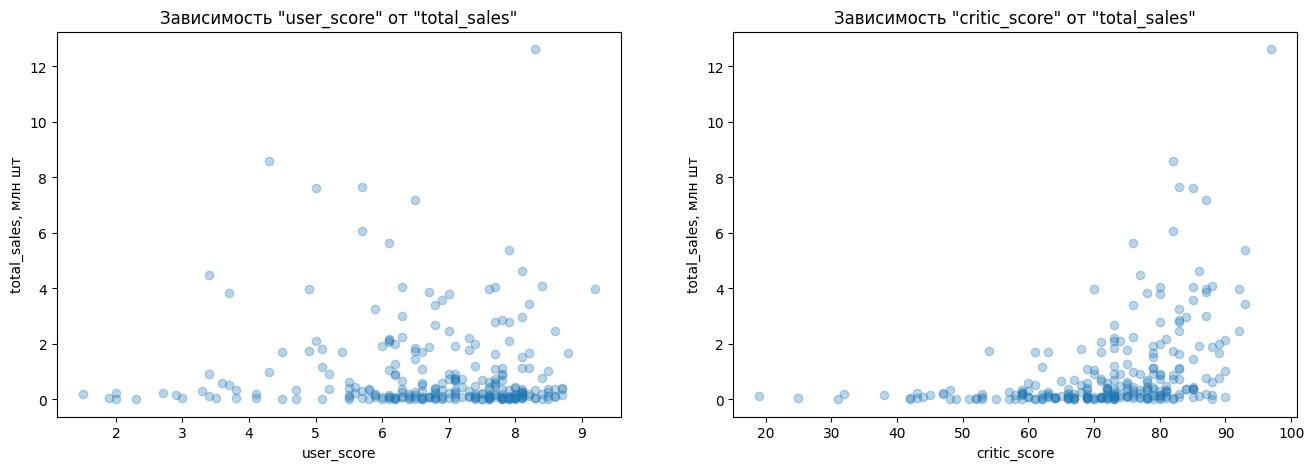

----------------------------------------------------------------------------------------------------------------------
Платформа 3DS

Коэффициент корреляции "user_score" и "total_sales": 19.76 %
Коэффициент корреляции "critic_score" и "total_sales": 32.08 %


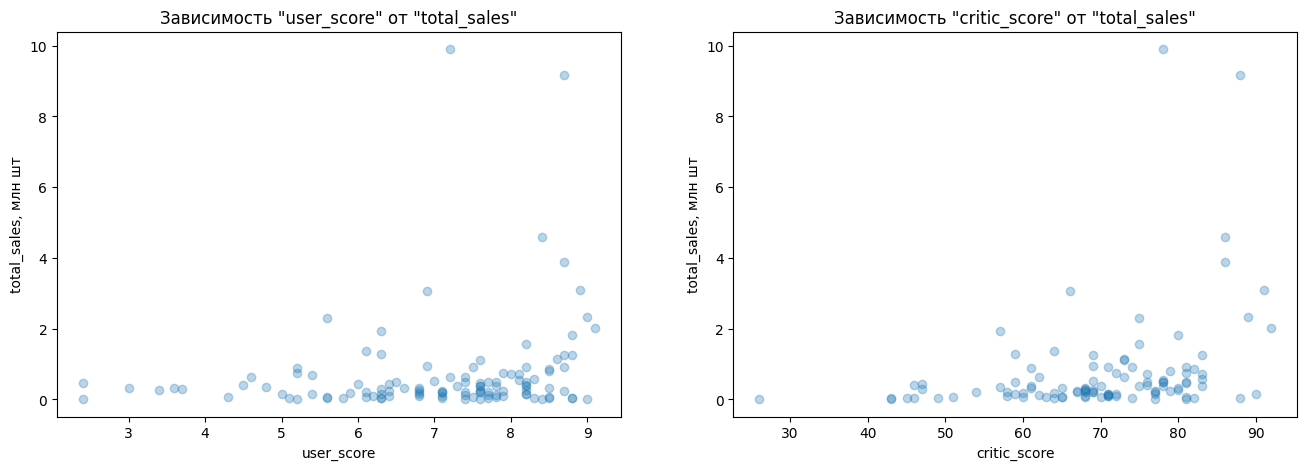

----------------------------------------------------------------------------------------------------------------------
Платформа Wii

Коэффициент корреляции "user_score" и "total_sales": 29.62 %
Коэффициент корреляции "critic_score" и "total_sales": -42.43 %


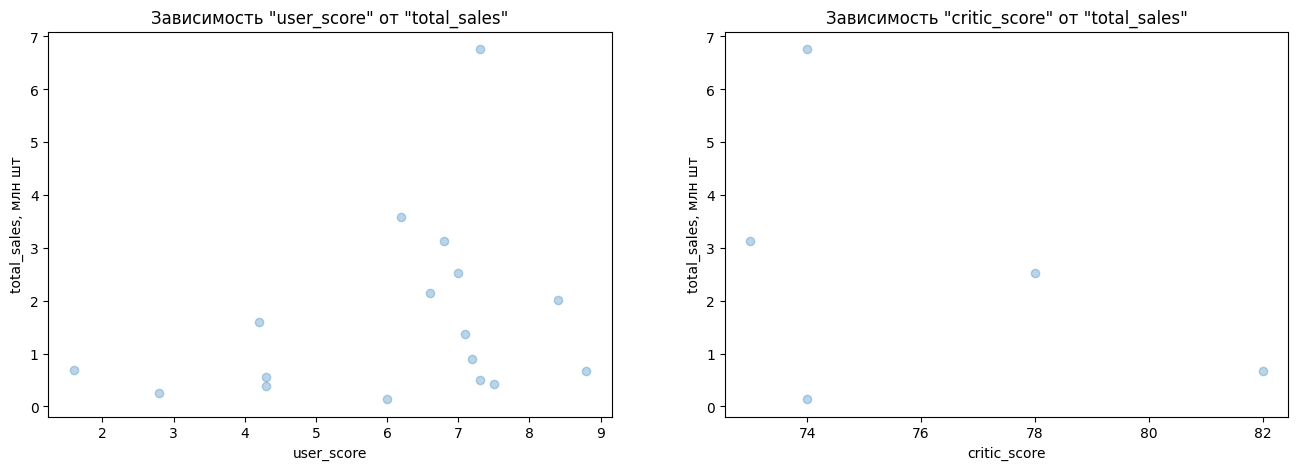

----------------------------------------------------------------------------------------------------------------------
Платформа PC

Коэффициент корреляции "user_score" и "total_sales": -12.19 %
Коэффициент корреляции "critic_score" и "total_sales": 23.72 %


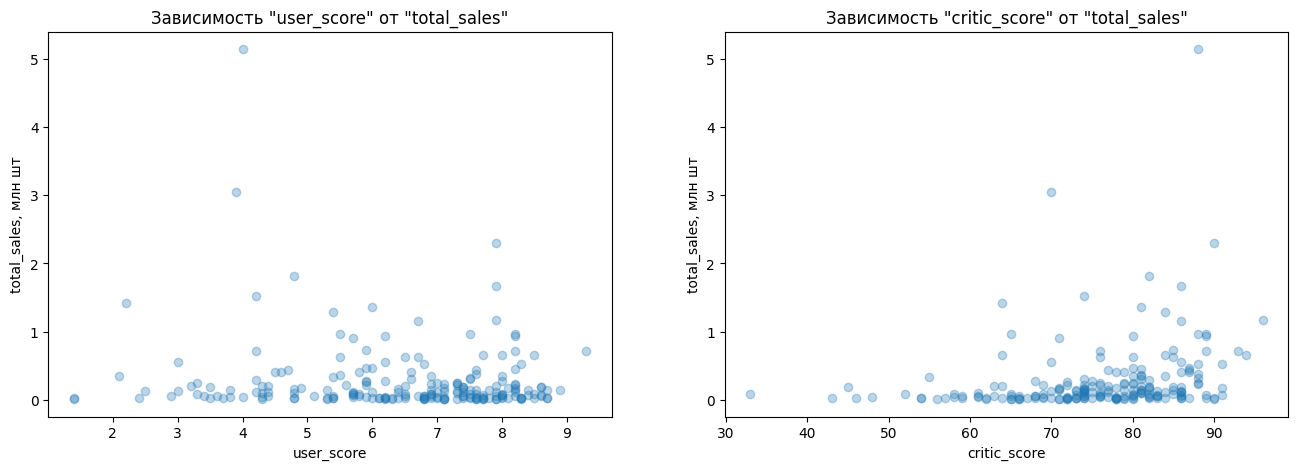

----------------------------------------------------------------------------------------------------------------------


In [202]:
platforms_for_corr = ['XOne', 'PS4', '3DS', 'Wii', 'PC'] #Cписок платформ для анализа корреляция

for i in range(len(platforms_for_corr)): #Цикл для построения точечных графиков и расчета коэфициентов корреялции для пяти платформ
    fig, axes = plt.subplots(1, 2)
    data_platform = data_actual[data_actual['platform'] == platforms_for_corr[i] ]
    x_1 = data_platform['user_score']
    x_2 = data_platform['critic_score']
    y = data_platform['total_sales']
    
    
    print('Платформа', platforms_for_corr[i])
    print()
    print('Коэффициент корреляции "user_score" и "total_sales":',  # вывод коэффициента корреляции
          round(data_platform['user_score'].corr(data_platform['total_sales'])*100, 2), '%')
    print('Коэффициент корреляции "critic_score" и "total_sales":', # вывод коэффициента корреляции
          round(data_platform['critic_score'].corr(data_platform['total_sales'])*100, 2), '%')

    axes[0].scatter(x_1, y, alpha=0.3) # создание точечного графика
    axes[0].set_title('Зависимость "user_score" от "total_sales"')
    axes[0].set_xlabel('user_score')
    axes[0].set_ylabel('total_sales, млн шт')
    
    axes[1].scatter(x_2, y, alpha=0.3) # создание точечного графика
    axes[1].set_title('Зависимость "critic_score" от "total_sales"')
    axes[1].set_xlabel('critic_score')
    axes[1].set_ylabel('total_sales, млн шт')
    
    fig.set_figwidth(16)
    fig.set_figheight(5)
    
    plt.show()
    print('----------------------------------------------------------------------------------------------------------------------')


Проанализировав зависимость количества продаж игр от их оценок пользователями и критиками по 5 популярным платформам, можно сделать вывод, что связь слабая. Ни в одном случае коэффициент корреляции не превысил 50%.

При отзывы критиков влияют больше на продажи, а корреляция с отзывмами пользователей близка у нулю.

Можно объяснить тем, что перед тем, как покупать игру, пользователь построит о ней мнение по статья / видеоблогам опытных людей. А оценки пользователей носят более субъективных характер и зависят от особенной каждого конкретного пользователя

Посмотрим на общее распределение игр по жанрам.
Для этого возьмем медианные значения по общим продажам:

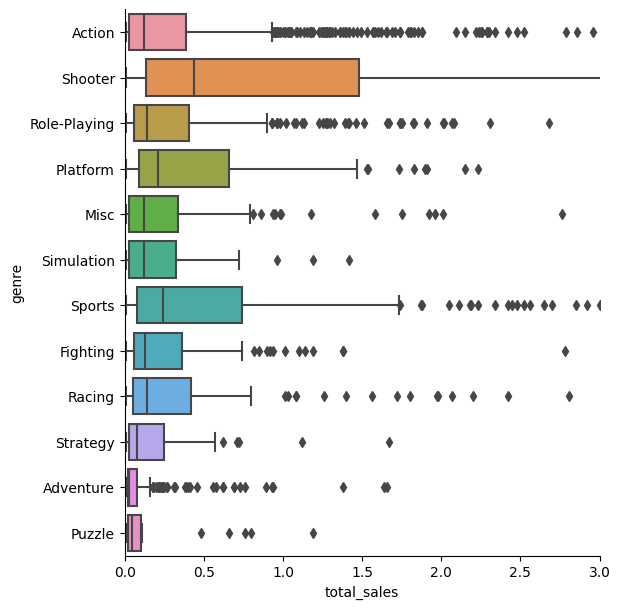

In [203]:
sns.catplot(data=data_actual, kind='box', x='total_sales', y='genre', orient='h', height=6)
plt.xlim(0, 3)
plt.show()

In [204]:
top_genres = ['Shooter', 'Sports', 'Platform']
for genre in top_genres:
    print('Медианное кол-во продаж в жанре',
          genre,
          round(data_actual['total_sales'][data_actual['genre'] == genre].median()*1000),
          'тыс. шт')


Медианное кол-во продаж в жанре Shooter 440 тыс. шт
Медианное кол-во продаж в жанре Sports 240 тыс. шт
Медианное кол-во продаж в жанре Platform 210 тыс. шт


Наиболее продаваемыми жанрами с 2012 по 2016 годы являлись 'Shooter', 'Sports', 'Role-Platform'.

Наименее продаваемые жанры: приключения, стратегии и пазлы.

## Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)
* Влиияние рейтинга ESRB на продажи в регионах

Для начала поймем в каком регионе сколько было продаж за последние 5 лет.
Наибольшее их количество было в Америке, но Европа находится близко по данному параметру.

In [205]:
data_actual[['na_sales', 'eu_sales', 'jp_sales']].sum()

na_sales    590.97
eu_sales    506.82
jp_sales    192.58
dtype: float64

C:\Users\andru\.conda\envs\practicum\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\andru\.conda\envs\practicum\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\andru\.conda\envs\practicum\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

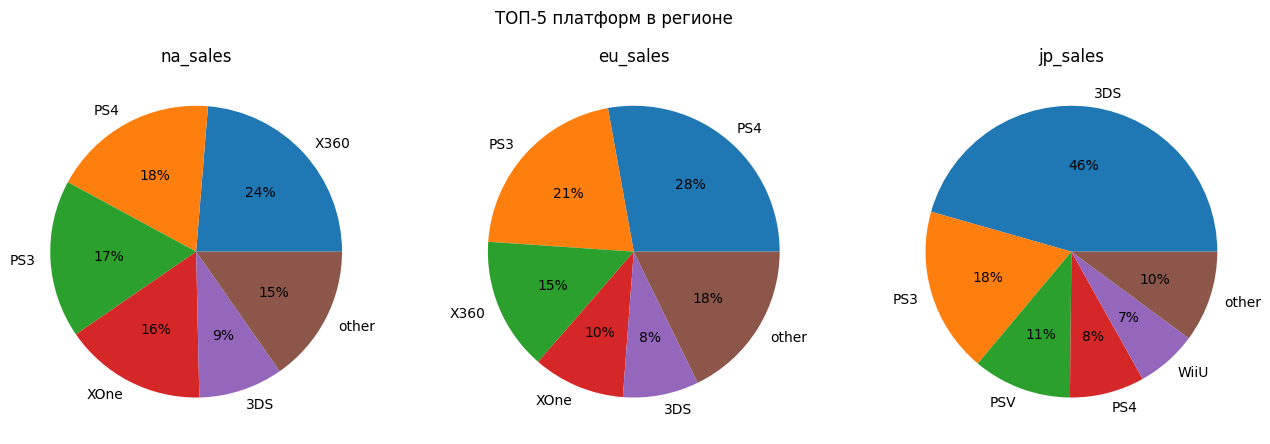

In [206]:
regions = ['na_sales', 'eu_sales', 'jp_sales'] #создаем список с тремя регионами

fig, ax = plt.subplots(1, 3, figsize = (10, 5))
plt.suptitle("ТОП-5 платформ в регионе") #общий заголовок для трех пай-чартов

for i in range(len(regions)): # Цикл для построения пай-чартов
    reg_sales = ( data_actual.pivot_table(index='platform',  # сводная таблица, где строки - платформы,
                                                    values=regions[i], # а значения - продажи в регионе
                                                    aggfunc='sum')  
    .sort_values(by=regions[i], ascending=False) )  # сортировка по убыванию
    
    sales_with_other = reg_sales[0:5] # оставляем топ-5 платформ
    sales_with_other.loc['other'] = reg_sales[5:].sum() # остальные суммируем и называем "other"
    
    data_pie = sales_with_other[regions[i]] 
    labels = sales_with_other.index
    
    ax[i].pie(data_pie, labels=labels, autopct='%.0f%%') # Строим пай-чарт
    ax[i].set_title(regions[i])
    fig.set_figwidth(16)
    fig.set_figheight(5)

plt.show()

Наблюдаем, что в Северной Америке наиболее популярны следующие платформы:
* X360
* PS4
* PS3
* XOne
* 3DS

Получается, что в данном регионе лучше всего продаются игры для X-box (американская платформа), далее PlayStation.

В Европе наиболее популярны те же платформы, что и в Америке, за исключением того, что PlayStation обходит X-box.

В Японии наиболее почти половина игр покупается для 3DS - консоли Nintendo (японская платформа), далее PlayStation.

**Можно заключить, что в регионах скорее превалируют национальные платформы (не считая Европы)**


**********************************************************************************************
Наиболее популярные жанры по регионам приведены ниже:

C:\Users\andru\.conda\envs\practicum\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\andru\.conda\envs\practicum\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\andru\.conda\envs\practicum\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

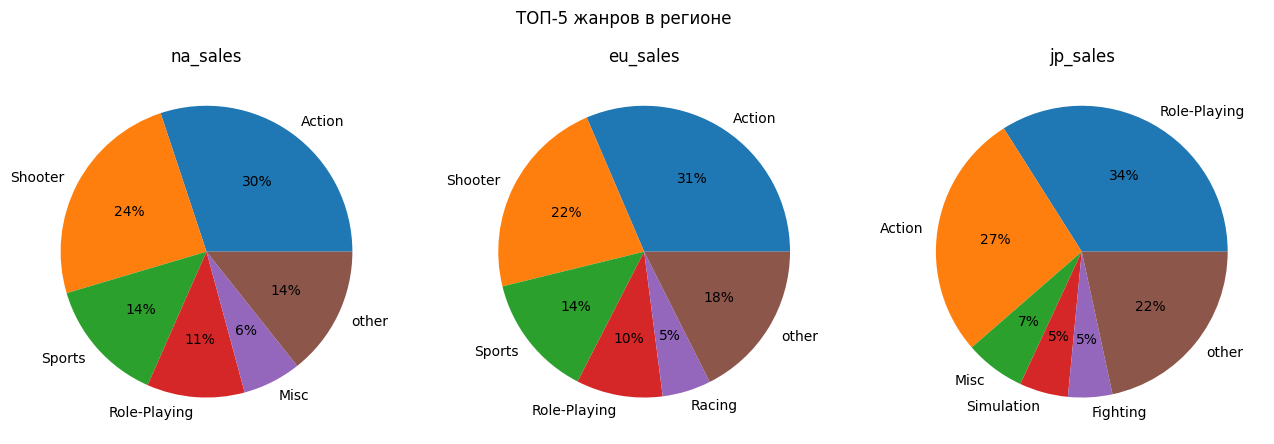

In [207]:
regions = ['na_sales', 'eu_sales', 'jp_sales'] #создаем список с тремя регионами

fig, ax = plt.subplots(1, 3, figsize = (10, 5))
plt.suptitle("ТОП-5 жанров в регионе") #общий заголовок для трех пай-чартов

for i in range(len(regions)): # Цикл для построения пай-чартов
    reg_sales = ( data_actual.pivot_table(index='genre',  # сводная таблица, где строки - жанры,
                                                    values=regions[i], # а значения - продажи в регионе
                                                    aggfunc='sum')  
    .sort_values(by=regions[i], ascending=False) )  # сортировка по убыванию
    
    sales_with_other = reg_sales[0:5] # оставляем топ-5 платформ
    sales_with_other.loc['other'] = reg_sales[5:].sum() # остальные суммируем и называем "other"
    
    data_pie = sales_with_other[regions[i]] 
    labels = sales_with_other.index
    
    ax[i].pie(data_pie, labels=labels, autopct='%.0f%%') # Строим пай-чарт
    ax[i].set_title(regions[i])
    fig.set_figwidth(16)
    fig.set_figheight(5)

plt.show()

Наблюдаем практически идентичные картины по Америке и Европе.
ТОП-4 жанра в этих регионах совпадают:
* Action
* Shooter
* Sports
* Role-Playing

Япония на их фоне отличается:
Здесь наиболее популярные жанры распределены следующим образом:
* Role-Playing
* Action
* Misc
* Simulation
* Fighting

Как видим, спорта в Японии в ТОП-5 вообще нет


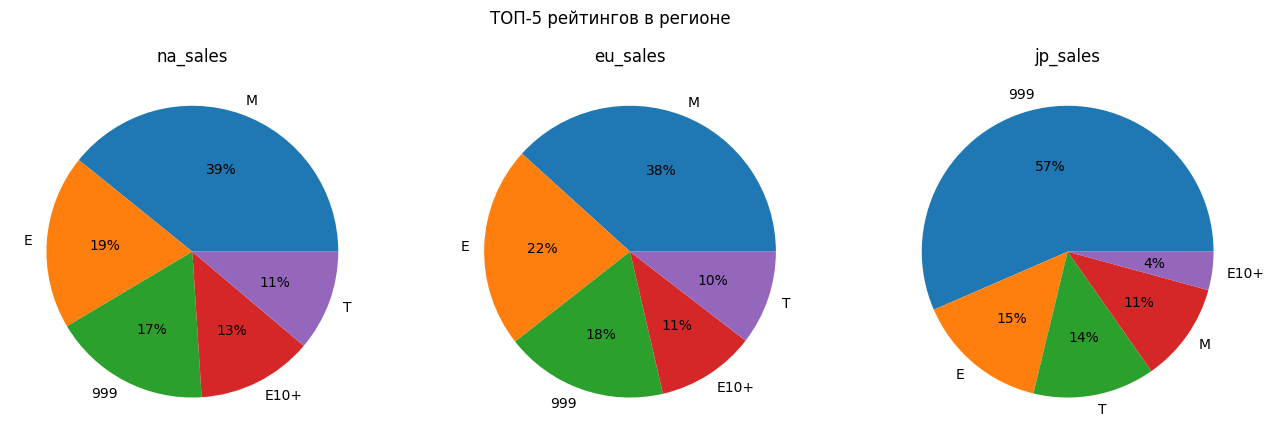

In [208]:
regions = ['na_sales', 'eu_sales', 'jp_sales'] #создаем список с тремя регионами

fig, ax = plt.subplots(1, 3, figsize = (10, 5))
plt.suptitle("ТОП-5 рейтингов в регионе") #общий заголовок для трех пай-чартов

for i in range(len(regions)): # Цикл для построения пай-чартов
    reg_sales = ( data_actual.pivot_table(index='rating',  # сводная таблица, где строки - рейтинг,
                                                    values=regions[i], # а значения - продажи в регионе
                                                    aggfunc='sum')  
    .sort_values(by=regions[i], ascending=False) )  # сортировка по убыванию
    
    
    data_pie = reg_sales[regions[i]] 
    labels = reg_sales.index
    
    ax[i].pie(data_pie, labels=labels, autopct='%.0f%%') # Строим пай-чарт
    ax[i].set_title(regions[i])
    fig.set_figwidth(16)
    fig.set_figheight(5)

plt.show()


Видно, что в Северной Америке и Европе наиболее распространенными рейтингами являются:
* M - "для взрослых" т.е старше 17 лет
* E - "для всех"
* нет рейтинга по ESRB
* E10+
* T - "для тинейджеров", т.е. старше 13 лет 

В Японии наиболее чаще встречаемой ситуацией стало, когда рейтинг игры не определен

Можно предположить, что игры выпускаемые для Японии сертицифицируются другим рейтингом, не ESRB. Отсюда и отсутствие данных по этому рейтингу

In [209]:
# Комментарий ревьюера
temp = data_actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


999     1275
M        498
T        412
E        395
E10+     306
Name: rating, dtype: int64

# 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0 - нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC равны

H1 - альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC не равны

Примем alpha = 0.05

Зададим два множества:
Оценки пользователей на XOne и PC

Проведем тест стьюдента для определения равенства средних значений двух генеральных совокупностей.
Сравним полученное значение p с заданным альфа.

В результате видно, что вероятность составляет 0,55 , что превышает заданное пороговое значение alpha. Следовательно, гипотеза о равенстве пользовательских оценок на платформах XOne и PC **верна**

In [210]:
#data_actual_no_spaces = ( data_actual[ ~data_actual['user_score'].isna()]

# Комментарий ревьюера
data_actual_no_spaces = ( data_actual[ ~data_actual['user_score'].isna()])
                         
sample_XOne = data_actual_no_spaces['user_score'][data['platform'] =="XOne" ]
sample_PC = data_actual_no_spaces['user_score'][data['platform'] =="PC" ]

alpha1 = 0.05

results = st.ttest_ind(sample_XOne, sample_PC)

if results.pvalue < alpha1:
    print('pvalue =', results.pvalue)
    print('Отвергаем гипотезу о равенстве рейтингов')
else:
    print('pvalue =', results.pvalue)
    print('Гипотеза о равенстве рейтингов верна')

pvalue = 0.5535080500643661
Гипотеза о равенстве рейтингов верна


In [211]:
sample_XOne.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [212]:
sample_PC.describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

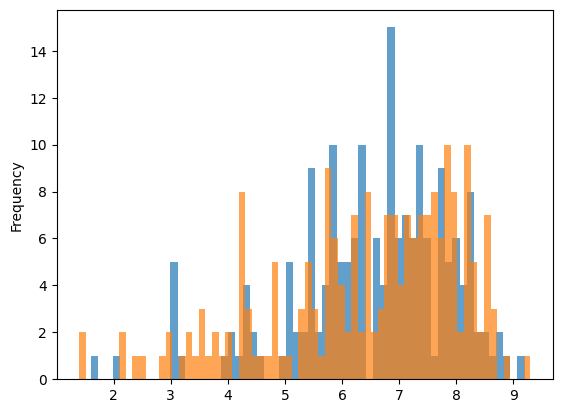

In [218]:
a = (sample_XOne.count() / 3).astype('int')

b = (sample_PC.count() / 3).astype('int')

sample_XOne.plot(kind='hist', bins=a, alpha=0.7)
sample_PC.plot(kind='hist', bins=b, alpha=0.7)
plt.show()

По описанию распределения видно, что средние значения близки: 6.42 и 6.52.<br>
Визуально распредления почти совпадают.

Аналогично со второй гипотезой:

H0 - нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports разные.

H1 - альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports равны.

Примем alpha = 0.05

Зададим два множества:
Оценки пользователей в жанрах Action и Sports

Проведем тест стьюдента для определения равенства средних значений двух генеральных совокупностей.
Сравним полученное значение p с заданным альфа.

В результате видно, что вероятность равенства составляет менее 3.716 * 10^(-26) , что не превышает заданное пороговое значение alpha. 
Помним, что наша гипотеза гласит, что средние значения **разные**, т.е не равны.

Следовательно, раз гипотеза о равенстве пользовательских оценок на платформах XOne и PC неверная, то гипотеза об их неравенстве **верна**

In [214]:
sample_action = data_actual_no_spaces['user_score'][data['genre'] =="Action" ]
sample_sports = data_actual_no_spaces['user_score'][data['genre'] =="Sports" ]

alpha2 = 0.05

results = st.ttest_ind(sample_action, sample_sports)

if (1-results.pvalue) > alpha2:
    print('pvalue =', results.pvalue)
    print('Гипотеза о неравенстве рейтингов верна')
else:
    print('pvalue =', results.pvalue)
    print('Отвергаем гипотезу о неравенстве рейтингов')

pvalue = 3.716308946093486e-26
Гипотеза о неравенстве рейтингов верна


In [215]:
sample_action.describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [216]:
sample_sports.describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

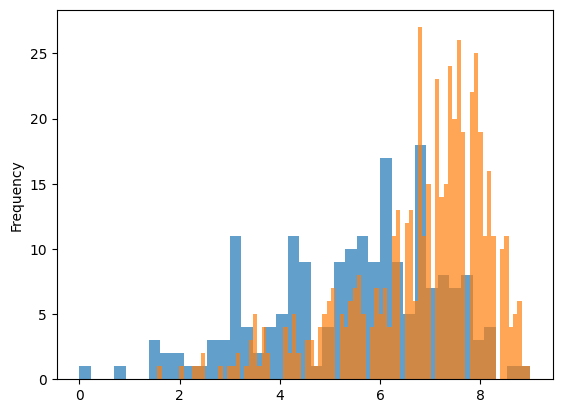

In [227]:
c = (sample_action.count() / 5).astype('int')
d = (sample_sports.count() / 5).astype('int')

sample_sports.plot(kind='hist', bins=d, alpha=0.7, range=(0,9))
sample_action.plot(kind='hist', bins=c, alpha=0.7, range=(0,9))
plt.show()

По описанию распределения видно, что средние значения далеки: 6.82 и 5.45.<br>
Визуально распределения совсем не совпадают

# Вывод:

Для максимизации прибыли на единицу затрат рекламного бюджета необходимо учесть ряд найденных нами закономерностей:


1. Ориентироваться на регион "Северная Америка". Будем считать его наиболее прибыльным т.к. наибольшее количество продаж делается именно там *(для оценки выручки за рамками данного проекта остается цены реализации в разных регионах, стоимость логистики и рекламы. Поэтому ориентируемся только на количество проданных экземпляров)*<br>
<br>
2. Рекламировать наш онлайн-магазин следует на наиболее популярных в данном регионе платформах:
* XOne
* PS4<br>
<br>
А учитывая, что динамика продаж данных платформ является падающей, то присматриваться к новым платформам, которые могут в скором времени набрать оборот.
  
3. Приоритетными жанрами выступят:
* Action
* Shooter


4. Рейтинг игр должен быть "M"


5. Если и обращать внимание на отзывы, то только на отзывы критиков, там корреляция с продажами лучше, однако и она довольна слабая. Оптимальный вариант - не брать в учёт этот фактор.